In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from bpartis.segment.model import ParticleSegmenter
from bpartis.segment.visualization import vis_segmap

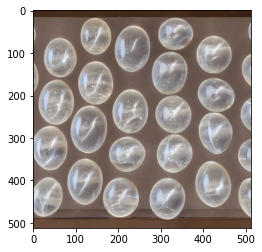

In [52]:
image = cv2.imread('./sample_pic/test.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
cv2.imread('./results/test_seg.png', cv2.IMREAD_GRAYSCALE)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

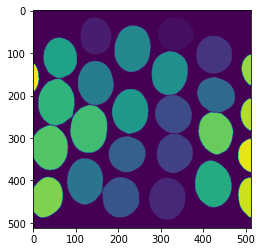

In [4]:
segmentation = cv2.imread('./results/test_seg.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(segmentation)
plt.show()

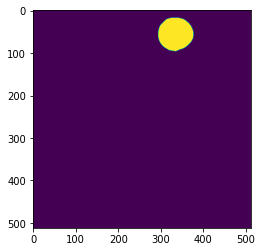

In [8]:
plt.imshow(segmentation==1)

In [39]:
# 輪郭検出
contours, hierarchy = cv2.findContours(segmentation.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [40]:
len(contours)

26

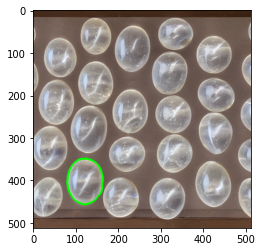

In [63]:
# 輪郭の描画
cnt = contours[5]
img = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), [cnt], 0, (0,255,0), 3)
plt.imshow(img)

In [64]:
# 面積
area = cv2.contourArea(cnt)
area

7018.5

In [62]:
# 周囲長
perimeter = cv2.arcLength(cnt,True)
perimeter

318.14927542209625

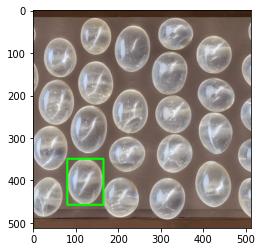

In [73]:
# 外接短形
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img)


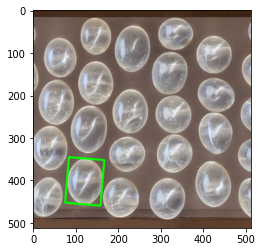

In [74]:
# 最小外接短形
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),[box],0,(0,255,0),3)
plt.imshow(img)

In [79]:
rect

((121.59654998779297, 402.3414001464844),
 (83.46070861816406, 107.37781524658203),
 4.763641834259033)

In [71]:
l_1 = ((box[0][0] - box[1][0])**2 + (box[0][1] - box[1][1])**2)**(1/2)
l_2 = ((box[0][0] - box[2][0])**2 + (box[0][1] - box[2][1])**2)**(1/2)
l_3 = ((box[0][0] - box[3][0])**2 + (box[0][1] - box[3][1])**2)**(1/2)
l_li = [l_1,l_2,l_3]
l_li.sort()

print('短辺: ',l_li[0])
print('長辺: ',l_li[1])
print('対角線: ',l_li[2])


短辺:  83.2946576918352
長辺:  107.37783756436893
対角線:  135.88230201170424


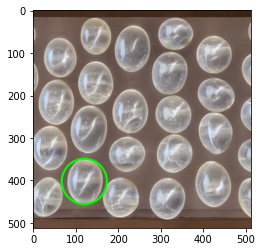

In [77]:
# 最小外接円
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),center,radius,(0,255,0),3)
plt.imshow(img)

In [87]:
cv2.minEnclosingCircle(cnt)

((120.5, 402.266357421875), 53.791873931884766)

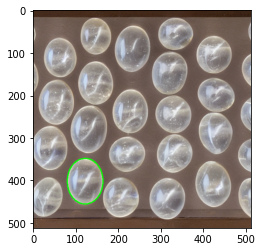

In [80]:
# 楕円近似
ellipse = cv2.fitEllipse(cnt)
img = cv2.ellipse(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),ellipse,(0,255,0),2)
plt.imshow(img)

In [81]:
ellipse

((122.0217056274414, 401.5985412597656),
 (83.7097396850586, 107.11857604980469),
 0.28457310795783997)

In [85]:
image!=[]

C:\Users\shaki\AppData\Local\Temp\ipykernel_35852\3831790531.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  image!=[]


True

In [1]:
import cv2
import matplotlib.pyplot as plt
from bpartis.segment.measurement import Measurer

image = cv2.imread('./sample_pic/test.png')
segmentation = cv2.imread('./results/test_seg.png', cv2.IMREAD_GRAYSCALE)

In [4]:
measurer = Measurer(segmentation, image)
measurer.params

,area,perimeter,rect_short,rect_long,rect_angle,ellipse_short,ellipse_long,ellipse_angle,circle_r
1,6423.0,301.078208,84.000000,97.000000,90.000000,84.274345,97.290306,5.332817,48.775787
2,2030.5,216.468036,29.000000,93.000000,0.000000,58.924755,93.557251,172.188049,46.502789
3,6295.0,297.421353,85.000000,93.000000,90.000000,86.516380,93.232399,178.871765,47.024063
4,5242.0,274.450791,69.000000,94.000000,90.000000,73.967369,94.464218,18.118105,48.420135
5,7076.0,318.391916,84.000000,108.000000,90.000000,83.858566,107.610184,171.163589,54.665779
6,7018.5,318.149275,83.460709,107.377815,4.763642,83.709740,107.118576,0.284573,53.791874
7,1720.5,188.811181,29.000000,78.000000,90.000000,71.705566,79.412888,167.569733,39.012917
8,5479.5,278.007141,82.734512,84.523369,26.565050,81.602852,85.295723,79.852859,43.176441
9,5932.0,288.249782,83.000000,91.000000,90.000000,83.377144,90.605942,12.312890,46.168083
10,6754.5,310.492422,81.000000,105.000000,0.000000,84.213669,103.517990,178.713242,52.515472


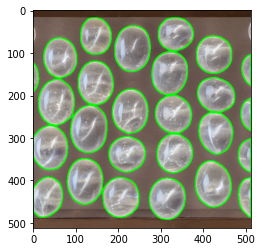

In [3]:
plt.imshow(measurer.draw_contours())

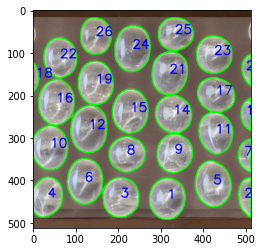

In [4]:
img = measurer.draw_contours()
plt.imshow(measurer.draw_num(img))

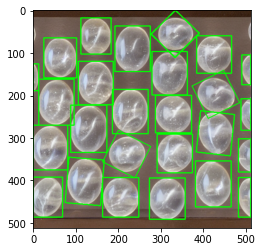

In [5]:
plt.imshow(measurer.draw_rect())

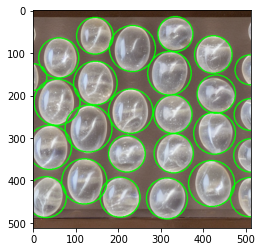

In [6]:
plt.imshow(measurer.draw_circle())

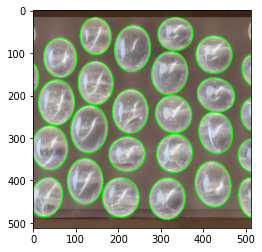

In [6]:
plt.imshow(measurer.draw_ellipse())

In [11]:
measurer.ellipses

[((314.9223327636719, 442.50830078125),
  (84.27434539794922, 97.2903060913086),
  5.3328166007995605),
 ((512.219970703125, 440.20074462890625),
  (58.92475509643555, 93.5572509765625),
  172.18804931640625),
 ((205.59793090820312, 439.43597412109375),
  (86.5163803100586, 93.2323989868164),
  178.87176513671875),
 ((31.298677444458008, 439.17962646484375),
  (73.96736907958984, 94.46421813964844),
  18.118104934692383),
 ((422.321044921875, 408.41455078125),
  (83.85856628417969, 107.61018371582031),
  171.16358947753906),
 ((122.0217056274414, 401.5985412597656),
  (83.7097396850586, 107.11857604980469),
  0.28457310795783997),
 ((517.4743041992188, 341.3500671386719),
  (71.70556640625, 79.41288757324219),
  167.56973266601562),
 ((220.3094482421875, 338.10028076171875),
  (81.60285186767578, 85.29572296142578),
  79.85285949707031),
 ((331.8392333984375, 336.0337829589844),
  (83.37714385986328, 90.60594177246094),
  12.31289005279541),
 ((39.19477462768555, 323.099365234375),
  (